# How Does Support Vector Machine Work?

There can be two scenarios for an SVM depending on the nature of data. Data can be of two types- linearly separable or non-linearly separable. Let's understand the working procedure of SVM for both cases.

#### Scenario 1: Data is linearly separable

To see what data is linearly separable, consider the following data plot-

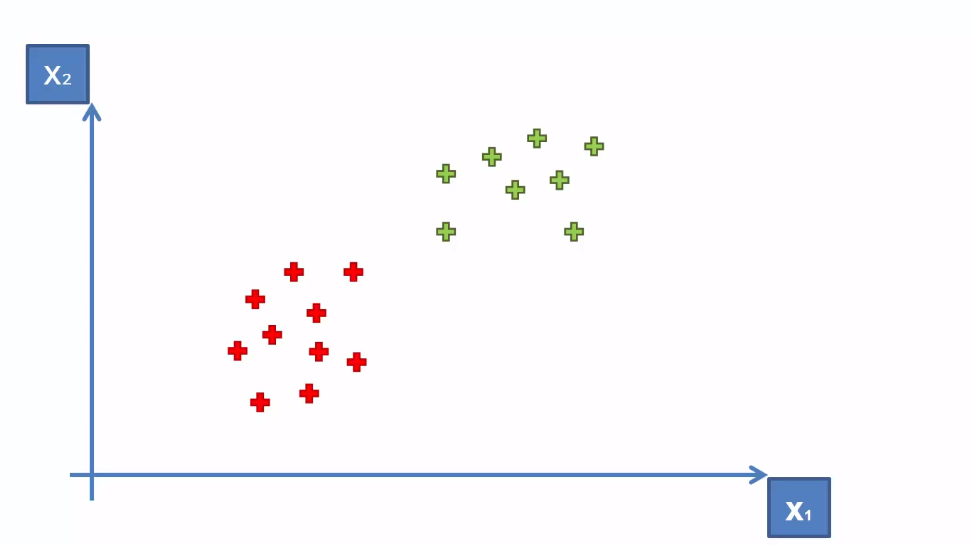

In [1]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm1.png')

#### Here the data is linearly separable because you can separate them into two classes just with a line. This line is known as the hyperplane in sense of and SVM. As we discussed earlier, SVM will find an optimal hyperplane that will separate the data into two "distinct" classes. This line can be drawn anywhere on the plane-

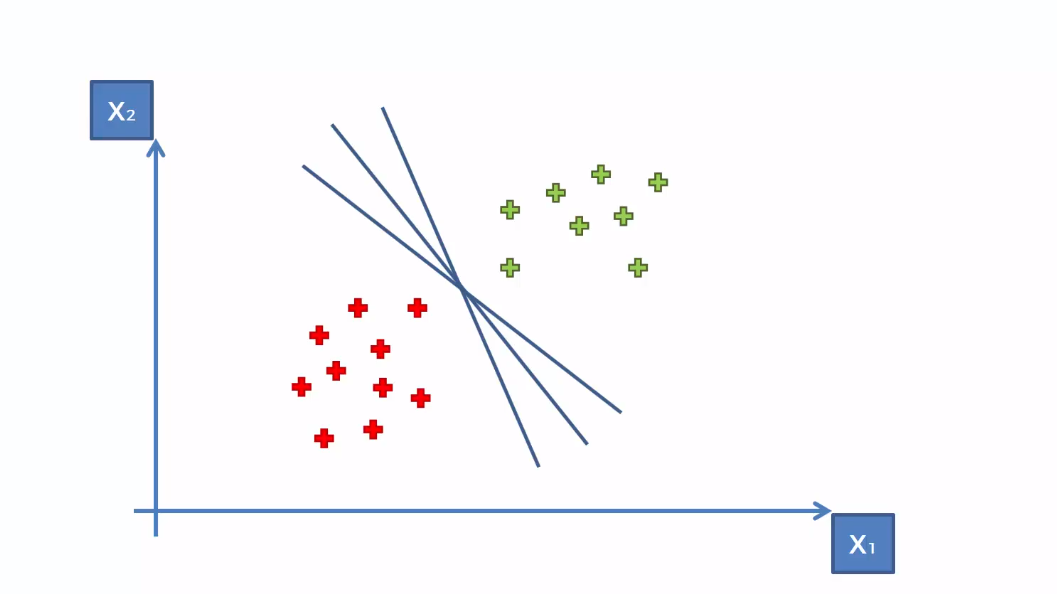

In [2]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm2.png')

#### In the above, any of the lines can separate the classes. But we need to take the optimal one, right? Here where the Support vectors come into play. SVM will find those two boundary data points or support vectors. These support vectors should be at a maximum margin from the optimal hyperplane. 

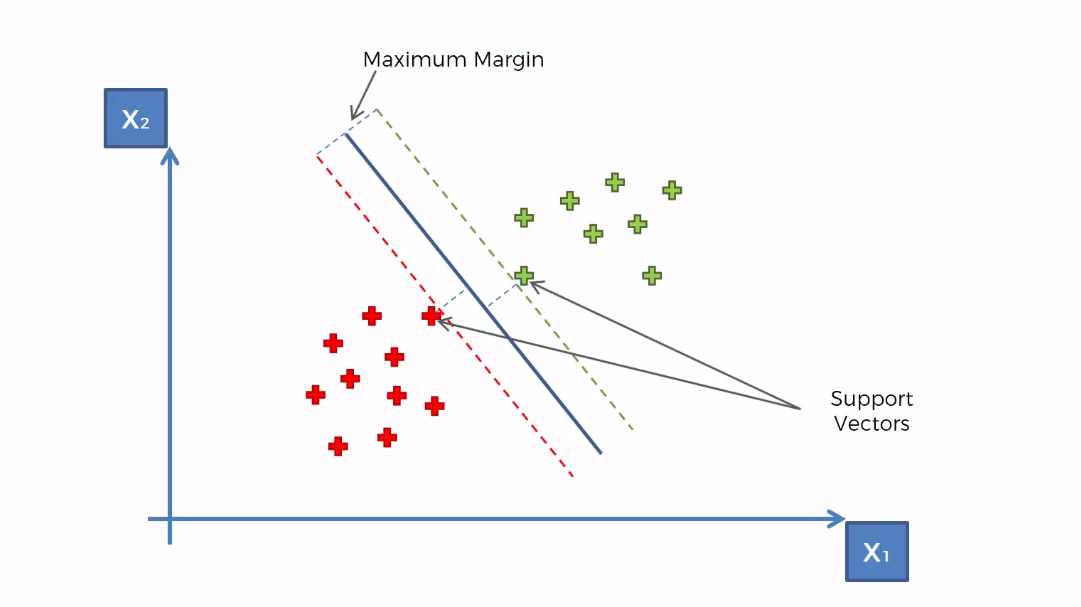

In [3]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm3.png')

#### the SVM finds the two closest support vectors and separates the classes with the optimal hyperplane.

## Scenerio 2: Data is not linearly separable

##### What if our data is in a more complex shape that they can not be linearly separable? Look at the following illustration-



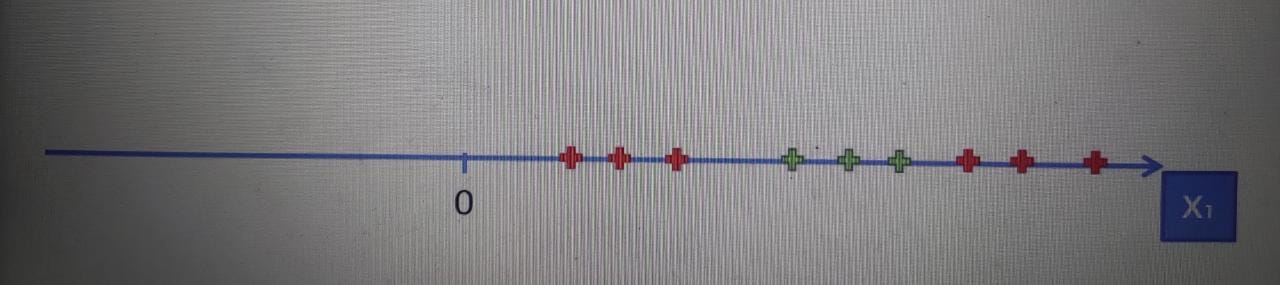

In [6]:
from IPython.display import Image
Image('/home/adish/Downloads/svmp1.jpeg')

##### here we have 9 data points which are non linearly separable .

- In a 1ine, the linear separator would be a point, in 2D the linear separator would be a line,in 3D it would be a plane.

###### can we sepearate red class and green class with a point separator??


#### This one is a non linearly separable dataset.


## how can we apply the method of increasing the dimensionality of the space to make it a linearly separable dataset in a higher dimension?????

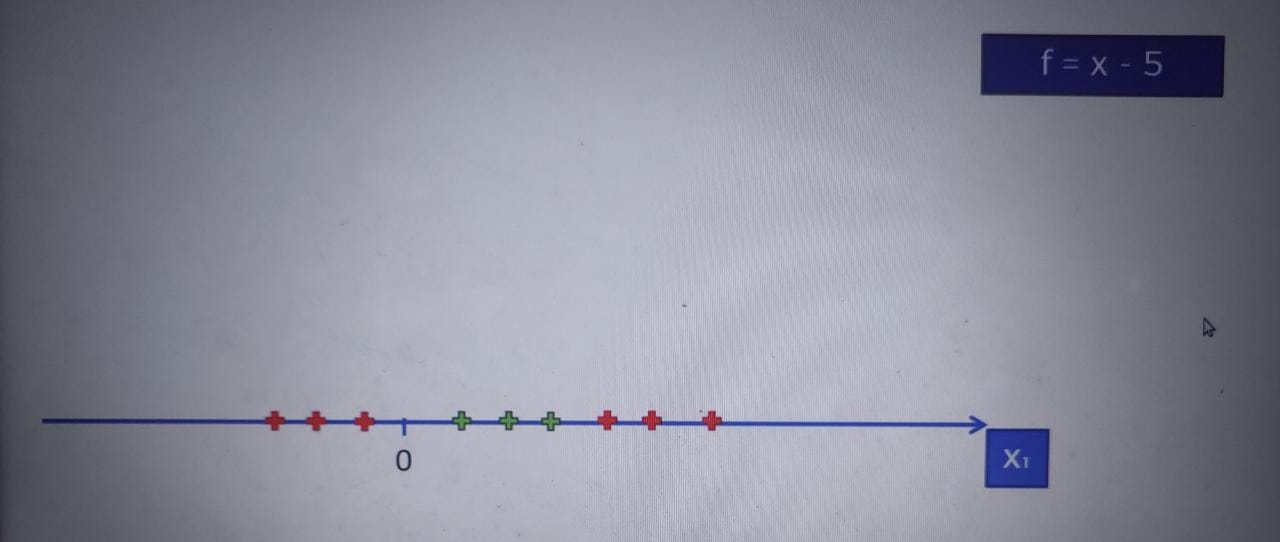

In [3]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm5.jpeg')

- here we introduce a function (f=x-5),which move the data points to the left side. 

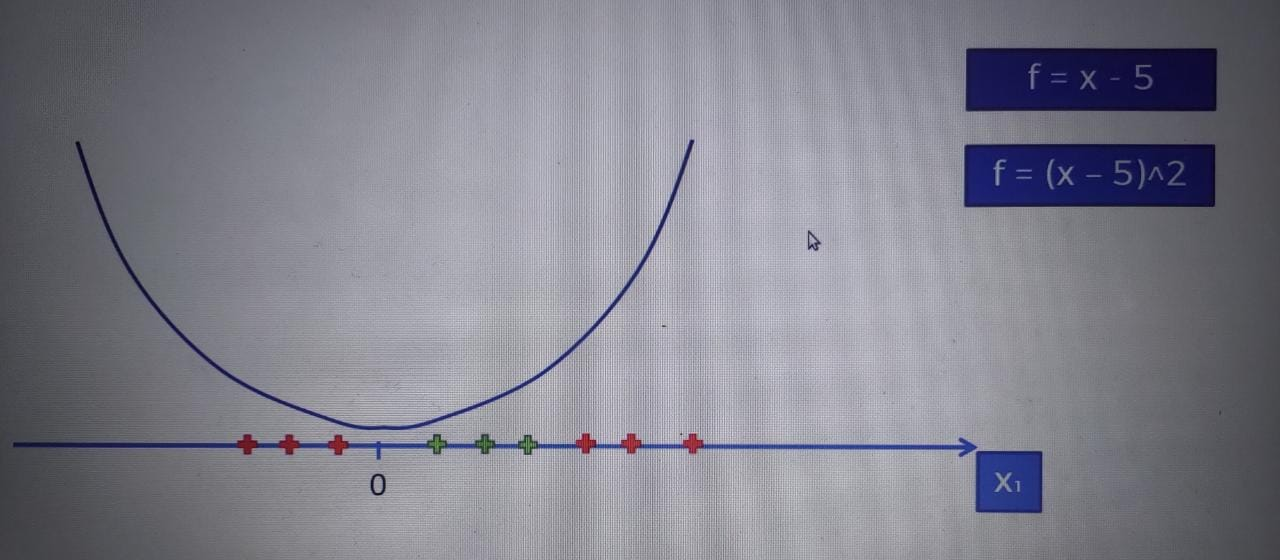

In [8]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm8.jpeg')

- then we introduce (f=(x-5)^2) ,whose shape will be a parabola facing upwards and then we map the datapoints to this parabola

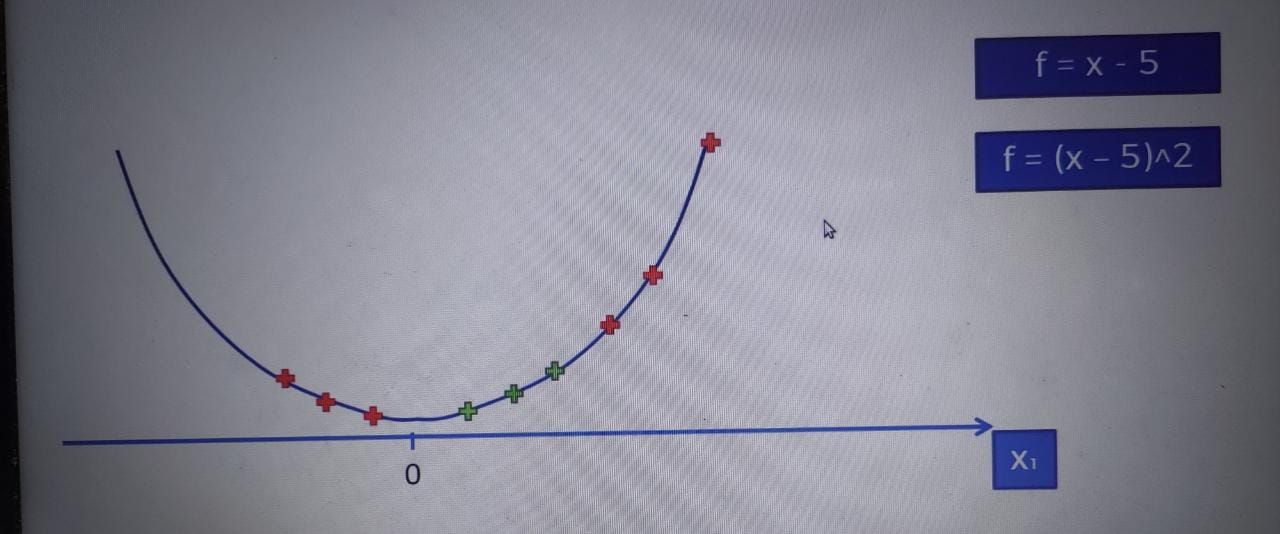

In [9]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm9.jpeg')

### Now we can find a linear separator(straight line in 2D),which separates red and green elements 

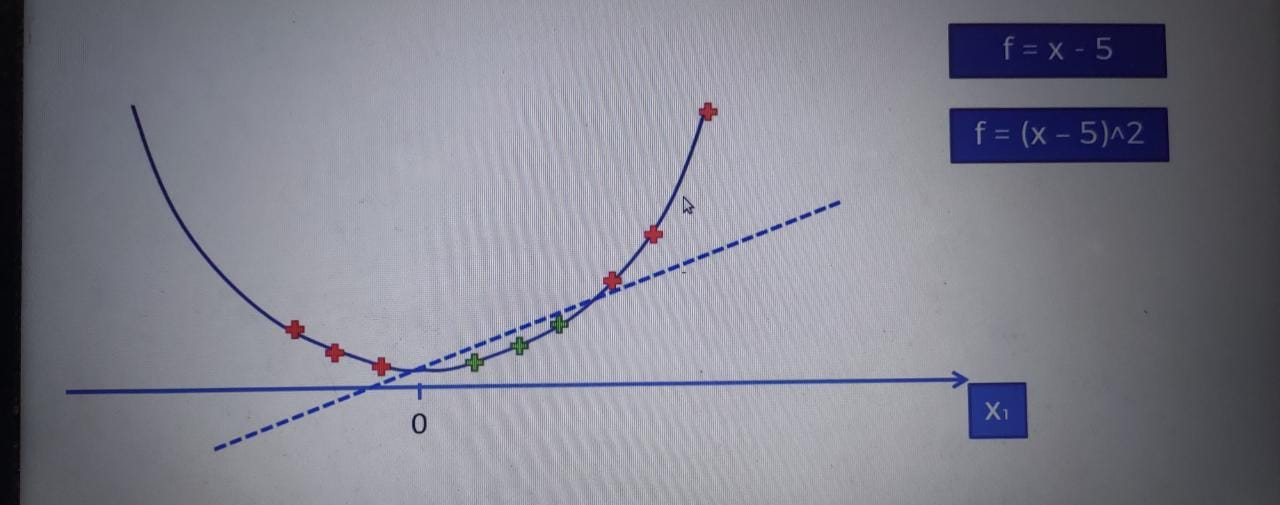

In [10]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm10.jpeg')

# Another example

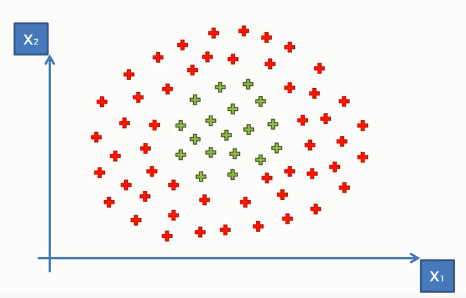

In [4]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm4.png')

#### we can not separate them as the data is not linearly separable. But SVM can. What it does in this sense that it takes the data into a higher dimension. In a higher dimension, the data will be in different shapes and hence can be linearly separable.

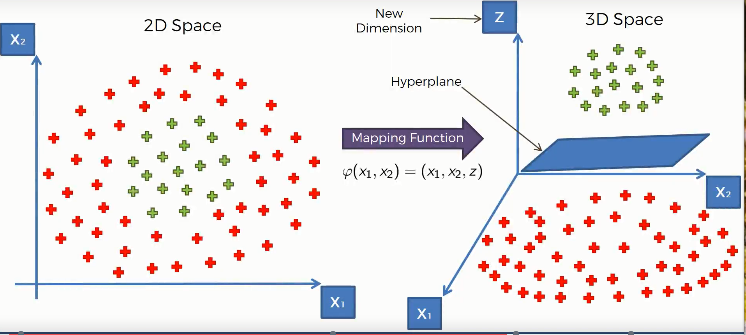

In [11]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm11.png')

 ### taking the data into three-dimensional space, they become linearly separable by a 2D hyperplane. SVM creates a mapping function that elevates the data into a higher dimension. There it tries to find the optimal hyperplane.  Then it projects back the data into its original dimension. Now, the data is well separated into two distinctive classes.

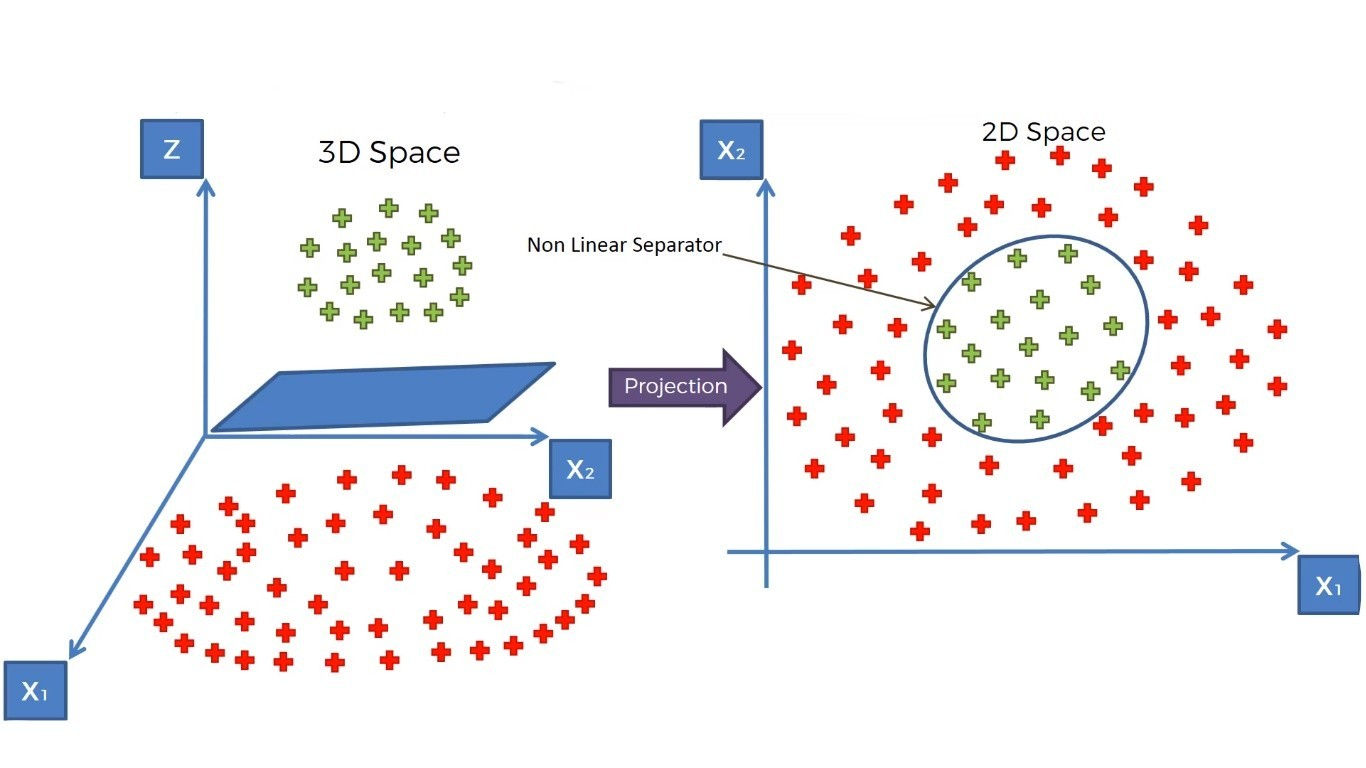

In [13]:
from IPython.display import Image
Image('/home/adish/Downloads/ksvm12.jpg')

## NOTE:mapping to a higher dimensional space can be computationally expensive and hence we will go for kernel trick to solve this problem

## Different Types of Kernels in SVM

There are many types of kernels are used in SVM. Some of the common kernels are-

- Linear Kernel
- Polynomial Kernel 
- Radial Basis Function of RBF Kernel
- Sigmoid Kernel
- Gaussian Kernel

## Which Kernel is Best for SVM?

There is no rule of thumb for a standard kernel in SVM. The choice of a kernel is data specific. Sometimes linear kernel works well for the data. If not, then you might go with Polynomial or Gaussian kernels. Though we can not say how good a kernel will be before using a kernel, in practice, the Gaussian kernel is the most widely used kernel. It works extremely well for well-behaved data i.e. data with no or less noise. For special-purpose problems or domains, you need to use more customized kernels. For instance, a graph kernel might be good when you want to classify graphs in a network or a string kernel is a good option for working with genetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('/home/adish/Desktop/Social_Network_Ads.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [10]:
y_pred = classifier.predict(xtest)
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest, y_pred)

[[64  4]
 [ 3 29]]


0.93